**Final Project**

**Distributed & Scalable Data Engr - DSCI-6007-01**

**Comprehensive Analysis of Real Estate Market**

**Team Members:Sai Siddu Vardhan Reddy Annadi, Vinay Kumar Reddy Punuru, Shiva Priya Pillalamarri**




Our project leverages data from Open Data DC, specifically focusing on the sale history of active properties listed in the District of Columbia’s real property tax assessment roll. The dataset includes approximately 108,996 records with 39 columns, capturing various property attributes such as area, number of bedrooms, and other key features. It also provides sale information, including sale prices and transaction dates.

The primary objective of our analysis is to explore the relationship between these property attributes and their influence on sale prices. By applying statistical analysis and predictive modeling, we aim to identify the key drivers of property valuation.

Dataset Source:
The dataset is sourced from Open Data DC’s Computer Assisted Mass Appraisal - Residential dataset. : https://opendata.dc.gov/datasets/DCGIS::computer-assisted-mass-appraisal-residential/explore

Key Considerations for Analysis:
This analysis will cover property sales from 2010 to 2024.
Properties with a sale price of $0 will be excluded from the analysis to ensure accuracy and relevance.

This approach will allow for a comprehensive understanding of how different property characteristics impact sale prices over time.

In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [87]:
sales = pd.read_csv("Residential.csv")
sales

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID
0,0153 0069,4.0,1.0,8.0,Ht Pump,Y,1.0,12.0,6.0,1911.0,...,11.0,Slate,6.0,Hardwood,1.0,6.0,11,2104,2024/10/09 09:16:46+00,134166027
1,0153 0094,3.0,1.0,1.0,Forced Air,Y,2.0,13.0,5.0,1912.0,...,2.0,Built Up,6.0,Hardwood,2.0,3.0,24,936,2024/10/09 09:16:46+00,134166028
2,0153 0095,3.0,1.0,7.0,Warm Cool,Y,2.0,6.0,4.0,1910.0,...,6.0,Metal- Sms,6.0,Hardwood,2.0,2.0,24,936,2024/10/09 09:16:46+00,134166029
3,0153 0096,3.0,1.0,7.0,Warm Cool,Y,2.0,11.0,4.0,1912.0,...,6.0,Metal- Sms,6.0,Hardwood,2.0,2.0,24,988,2024/10/09 09:16:46+00,134166030
4,0153 0100,4.0,1.0,1.0,Forced Air,Y,3.0,11.0,5.0,1912.0,...,2.0,Built Up,6.0,Hardwood,3.0,4.0,24,1674,2024/10/09 09:16:46+00,134166031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109029,PAR 00770224,3.0,1.0,13.0,Hot Water Rad,N,1.0,7.0,4.0,1936.0,...,11.0,Slate,6.0,Hardwood,1.0,3.0,12,10454,2024/10/09 09:16:46+00,134384288
109030,PAR 00770227,5.0,1.0,7.0,Warm Cool,Y,1.0,13.0,5.0,1930.0,...,11.0,Slate,6.0,Hardwood,1.0,3.0,12,14594,2024/10/09 09:16:46+00,134384289
109031,PAR 00780041,3.0,1.0,1.0,Forced Air,Y,1.0,7.0,3.0,1952.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,12,9064,2024/10/09 09:16:46+00,134384290
109032,PAR 00780044,4.0,0.0,13.0,Hot Water Rad,N,1.0,10.0,4.0,1953.0,...,2.0,Built Up,3.0,Wood Floor,1.0,1.0,12,11450,2024/10/09 09:16:46+00,134384291


In [89]:
sales.columns= sales.columns.str.lower()

# Check data
print(sales.shape)
print(sales.info())
print(sales.head())

(109034, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109034 entries, 0 to 109033
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ssl                109034 non-null  object 
 1   bathrm             107227 non-null  float64
 2   hf_bathrm          107227 non-null  float64
 3   heat               107227 non-null  float64
 4   heat_d             107227 non-null  object 
 5   ac                 107227 non-null  object 
 6   num_units          107227 non-null  float64
 7   rooms              107166 non-null  float64
 8   bedrm              107212 non-null  float64
 9   ayb                109010 non-null  float64
 10  yr_rmdl            57075 non-null   float64
 11  eyb                109034 non-null  int64  
 12  stories            107059 non-null  float64
 13  saledate           109034 non-null  object 
 14  price              96827 non-null   float64
 15  qualified          109034 non-null  ob

In [91]:
# Create new variables for the year, month, and day to work with
sales["saledate"] = pd.to_datetime(sales["saledate"])
sales["sale_year"] = sales["saledate"].dt.year
sales["sale_month"] = sales["saledate"].dt.month
sales["sale_day"] = sales["saledate"].dt.day
print(sales["sale_day"])

# Create a variable for the month name
month_names = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

sales["sale_named_month"] = sales["sale_month"].map(lambda x: month_names[x-1])

# Convert to an ordered categorical variable
sales["sale_named_month"] = pd.Categorical(sales["sale_named_month"], categories = month_names, ordered = True)

sales["sale_named_month"].head()


# Create a boolean variable for if the property sold for a price over $)
sales.insert(sales.columns.get_loc("price")+1, "with_pricess", sales["price"].apply(lambda x: False if x == 0 else True))

# Create a boolean for if the property was remodeled
sales.insert(sales.columns.get_loc("yr_rmdl")+1, "remodele", sales["yr_rmdl"].notnull())

0         19
1          4
2         22
3         27
4         18
          ..
109029    16
109030     3
109031     8
109032     3
109033     3
Name: sale_day, Length: 109034, dtype: int32


In [109]:
# Create variables looking at how much time has passed since January 1 2010, the start date of the subset we are working with
def year_diff(a, b):
    return (a.dt.year - b.year)

def month_diff(a, b):
    return 12 * (a.dt.year - b.year) + (a.dt.month - b.month)

sales["num_years_passed"] = year_diff(sales["saledate"], pd.Timestamp("2010/01/01 00:00:00+00"))
sales["num_months_passed"] = month_diff(sales["saledate"], pd.Timestamp("2010/01/01 00:00:00+00"))
sales["num_days_passed"] = (sales["saledate"] - pd.Timestamp("2010/01/01 00:00:00+00")).dt.days


## Sales per year

print(sales["sale_year"].value_counts())

sale_year
1900    15985
2021     7735
2022     6709
2020     5913
2023     5818
        ...  
1959        1
1960        1
1956        1
1962        1
1947        1
Name: count, Length: 68, dtype: int64


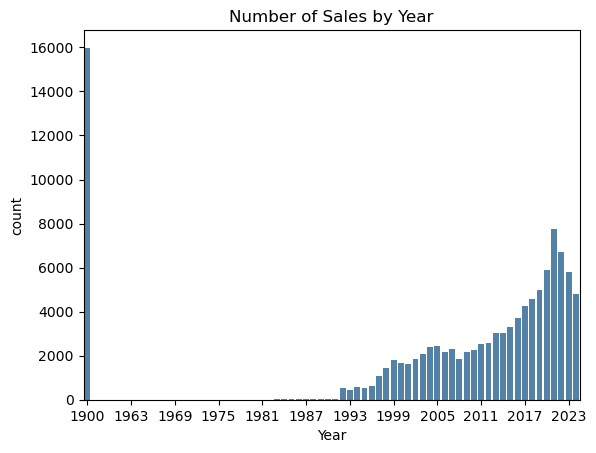

In [119]:
# Bar chart of sales per year
year_graph_data = sales["sale_year"].value_counts().rename_axis(["sale_year"]).reset_index(name = "count")

year_graph = sns.barplot(data = year_graph_data, x = "sale_year", y = "count", color = "steelblue")
year_graph.set(title = "Number of Sales by Year", xlabel = "Year")
year_graph.set_xticks(range(0, 69, 6))
plt.show()

In [121]:
# Removing unneeded variables and filtering
# There are 20 rows in our subset that are missing the sale price. Given the importance of this variable in our project and the small number of sales missing this data, it makes sense to filter out these rows

# Number of rows in our subset missing sale price
print(len(sales[(sales["sale_year"] >= 2010) & (sales["sale_year"] < 2025) & sales["price"].isnull()]))

# We can add more variables this if we identify more unneeded variables
cols_to_drop = ["ssl", "gis_last_mod_dttm", "objectid"]

# We will use this dataframe for the rest of the analysis
sales_trimmed = sales[(sales["sale_year"] >= 2010) & (sales["sale_year"] < 2025) & sales["price"].notnull()].drop(cols_to_drop, axis = 1)

16


# **EDA**

Trimmed Data Frame

In [123]:
print(sales_trimmed.shape)
print(sales_trimmed.info())
# For this it makes sense to only use sales where the property sold for a price, not for $0
sales_trimmed_with_price = sales_trimmed[sales_trimmed["with_pricess"] == True]

(65164, 45)
<class 'pandas.core.frame.DataFrame'>
Index: 65164 entries, 0 to 109033
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   bathrm             63964 non-null  float64            
 1   hf_bathrm          63964 non-null  float64            
 2   heat               63964 non-null  float64            
 3   heat_d             63964 non-null  object             
 4   ac                 63964 non-null  object             
 5   num_units          63964 non-null  float64            
 6   rooms              63922 non-null  float64            
 7   bedrm              63955 non-null  float64            
 8   ayb                65146 non-null  float64            
 9   yr_rmdl            40540 non-null  float64            
 10  remodele           65164 non-null  bool               
 11  eyb                65164 non-null  int64              
 12  stories            63806 non-null  flo

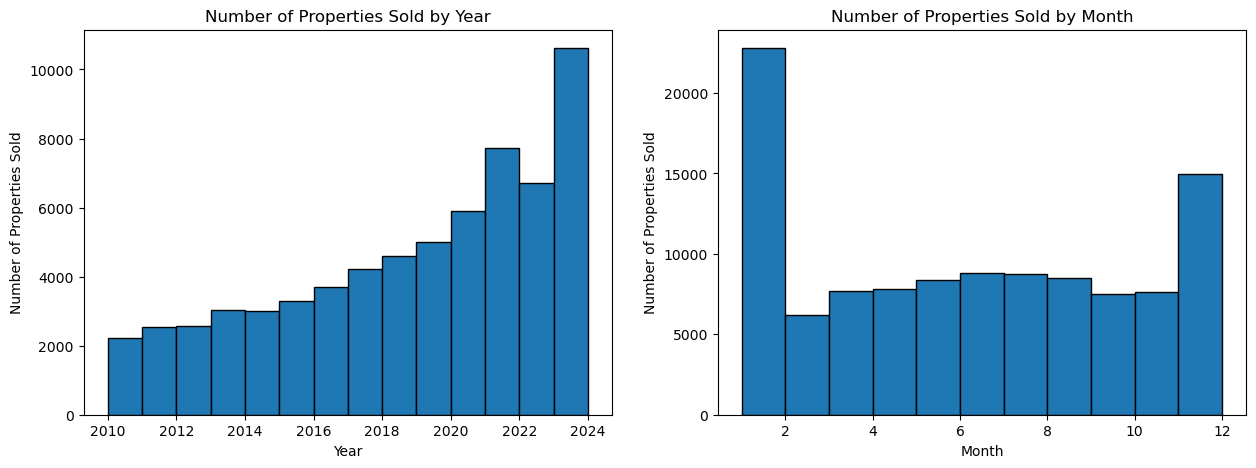

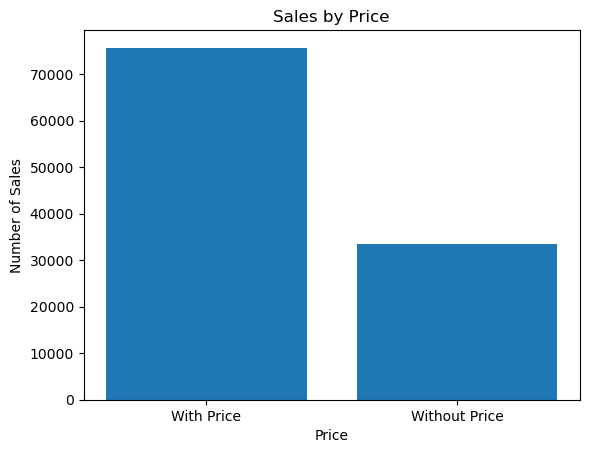

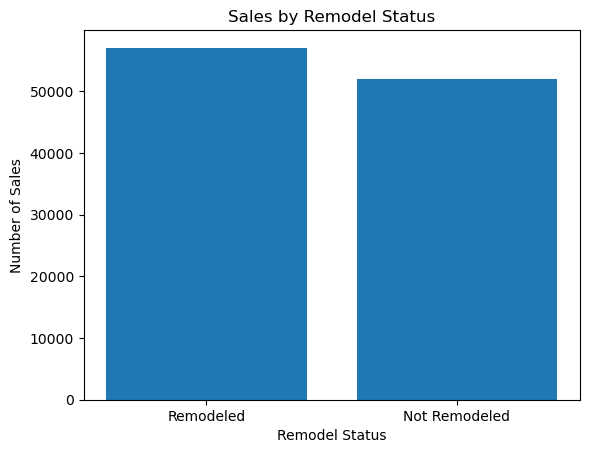

In [131]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# Histogram of the number of properties sold by year
axs[0].hist(sales["sale_year"], bins=range(2010,2025), edgecolor='black')
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of Properties Sold")
axs[0].set_title("Number of Properties Sold by Year")

# Histogram of the number of properties sold by month
axs[1].hist(sales["sale_month"], bins=range(1,13), edgecolor='black')
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Number of Properties Sold")
axs[1].set_title("Number of Properties Sold by Month")

plt.show()


price_counts = sales["with_pricess"].value_counts()

# Bar chart of the sales by price
plt.bar(["With Price", "Without Price"], price_counts.values)
plt.xlabel("Price")
plt.ylabel("Number of Sales")
plt.title("Sales by Price")
plt.show()

# Total Count of number of sales with and without a remodel
remodel_counts = sales["remodele"].value_counts()

# Bar chart of the sales by remodel status
plt.bar(["Remodeled", "Not Remodeled"], remodel_counts.values)
plt.xlabel("Remodel Status")
plt.ylabel("Number of Sales")
plt.title("Sales by Remodel Status")
plt.show()

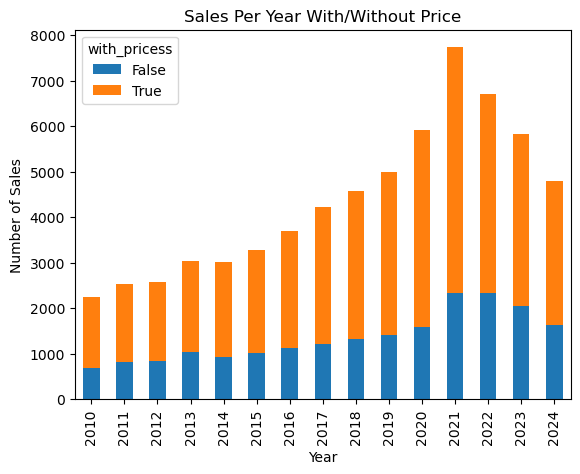

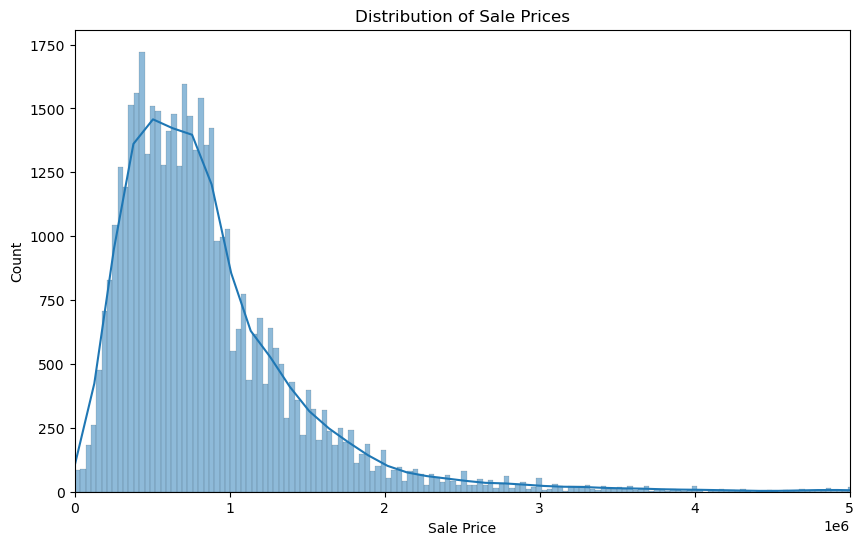

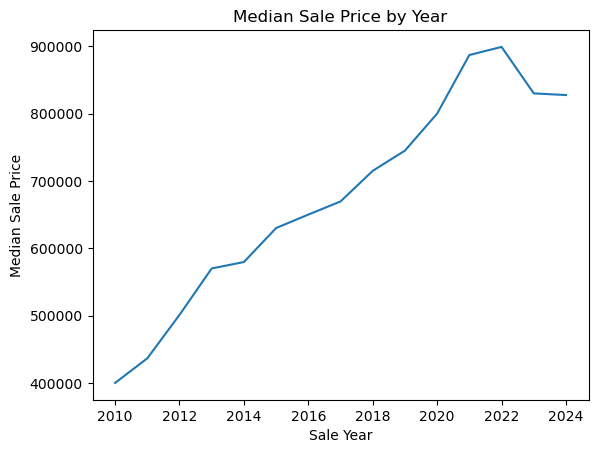

In [133]:
# Sales per year with price vs no price stacked bar chart``

#change to years 2010 throough 2025
sales_subset = sales[(sales["sale_year"] >= 2010) & (sales["sale_year"] < 2025)]
sales_with_price = sales_subset.groupby(["sale_year", "with_pricess"]).size().unstack(fill_value=0)
sales_with_price.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.title("Sales Per Year With/Without Price")
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(sales_trimmed_with_price['price'], kde=True)
plt.xlim(0, 0.5e7)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.show()


median_prices_by_year = sales_trimmed_with_price.groupby("sale_year")["price"].median().reset_index(name="median_price")

sns.lineplot(x="sale_year", y="median_price", data=median_prices_by_year)
plt.xlabel("Sale Year")
plt.ylabel("Median Sale Price")
plt.title("Median Sale Price by Year")
plt.show()

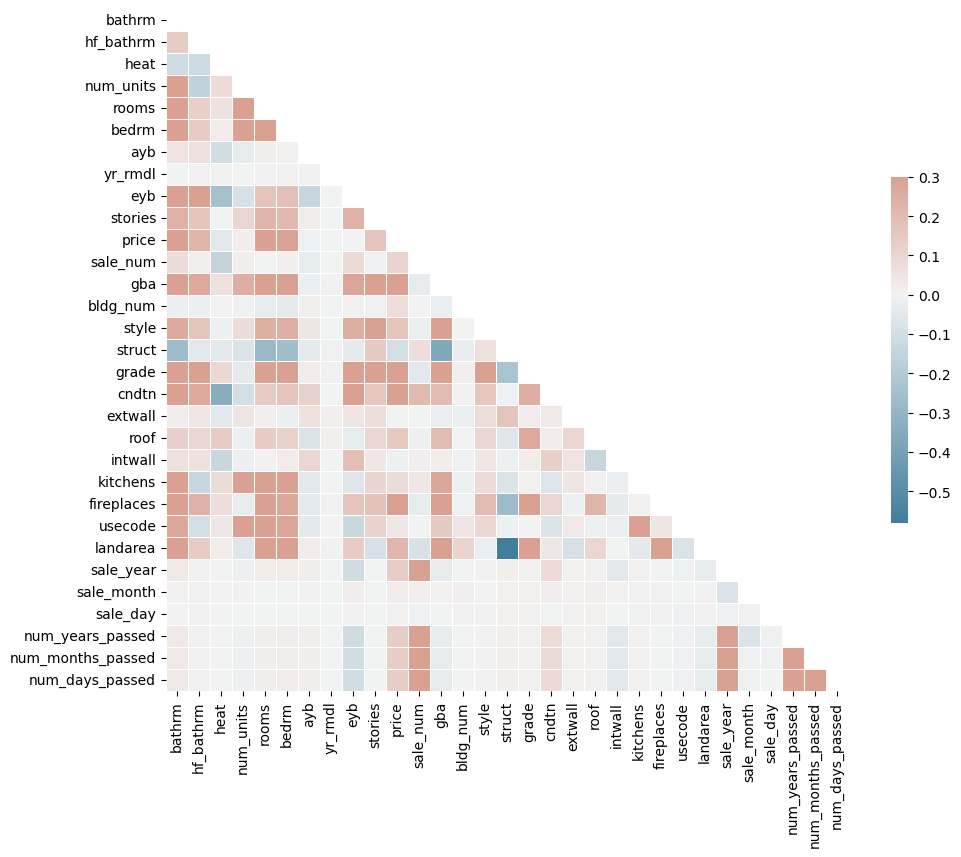

In [135]:
numeric_columns = sales_trimmed.select_dtypes(include=[np.number])

# Computing the correlation matrix
corr = numeric_columns.corr()

# Set up the matplotlib figure
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

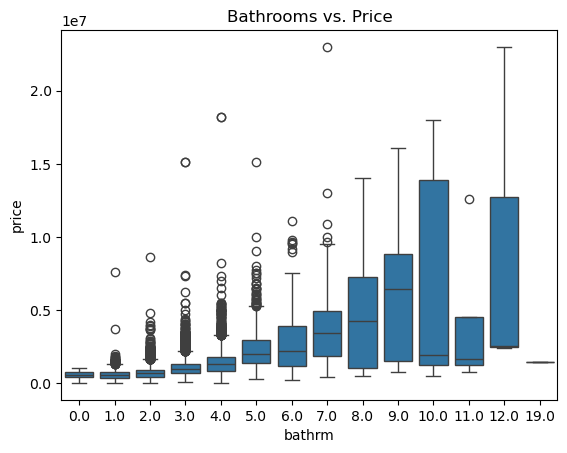

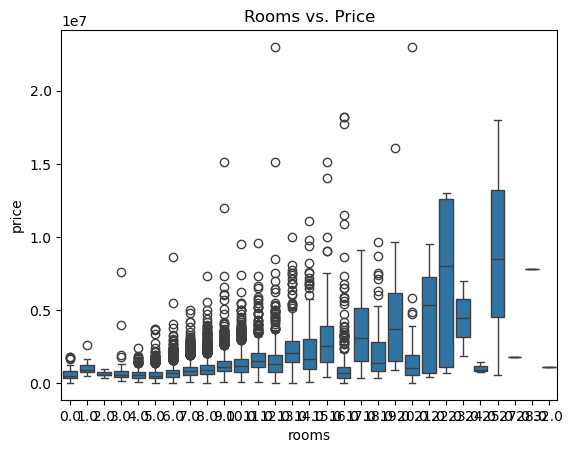

In [184]:
# Creating scatterplots of highly correlated variables
sns.boxplot(x='bathrm', y='price', data=sales_trimmed_with_price)
plt.title('Bathrooms vs. Price')
plt.show()

sns.boxplot(x='rooms', y='price', data=sales_trimmed_with_price)
plt.title('Rooms vs. Price')
plt.show()

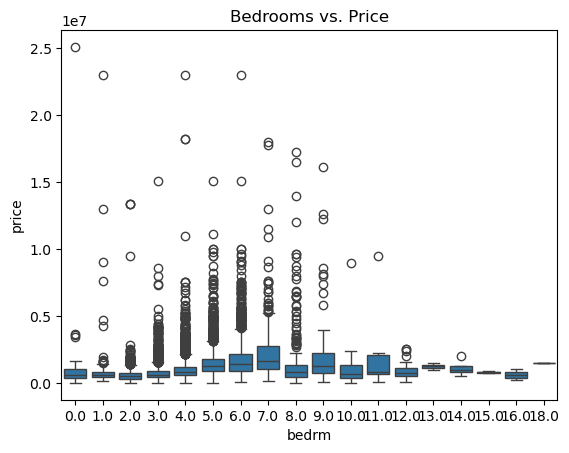

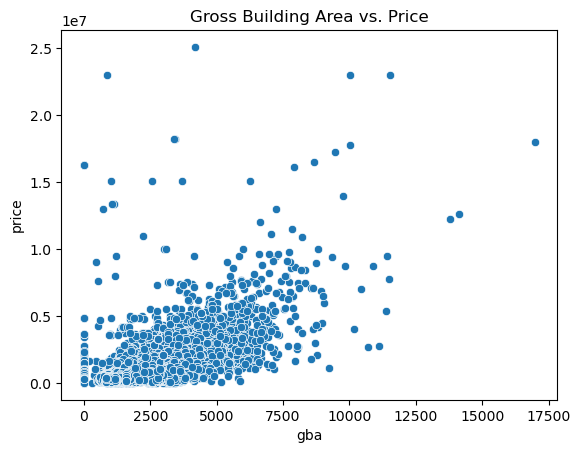

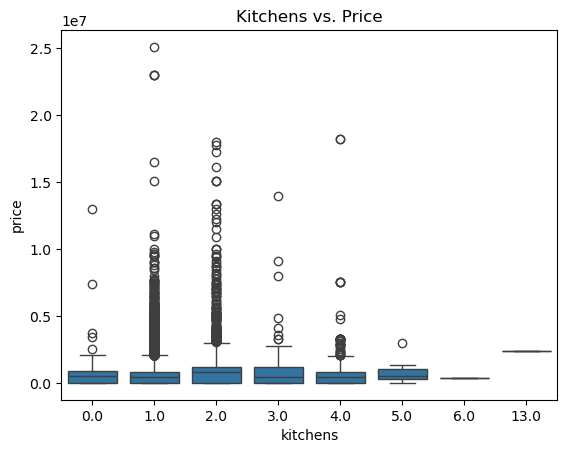

In [139]:
sns.boxplot(x='bedrm', y='price', data=sales_trimmed_with_price)
plt.title('Bedrooms vs. Price')
plt.show()

sns.scatterplot(x='gba', y='price', data=sales_trimmed_with_price)
plt.title('Gross Building Area vs. Price')
plt.show()

sns.boxplot(x='kitchens', y='price', data=sales_trimmed)
plt.title('Kitchens vs. Price')
plt.show()

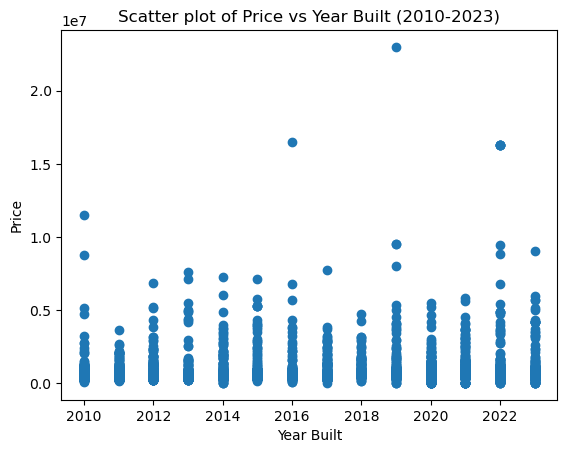

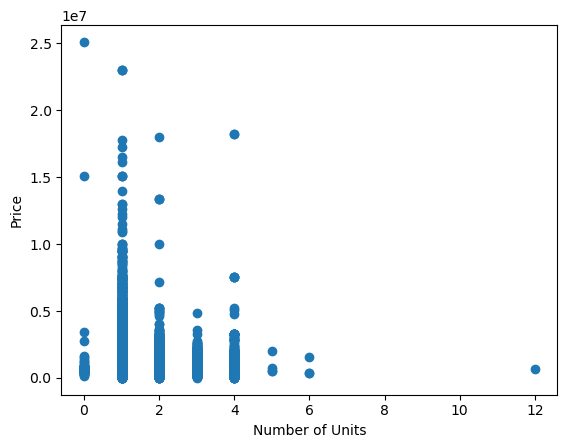

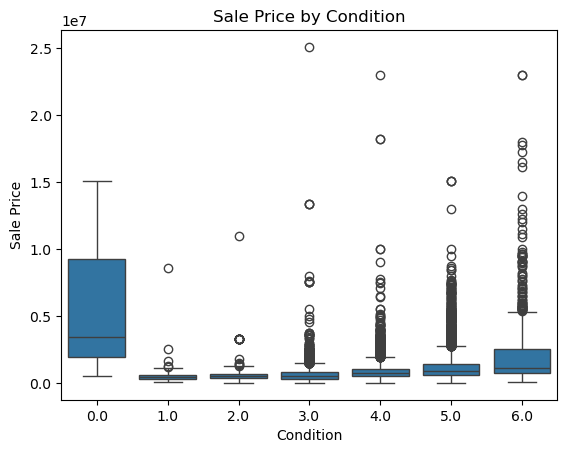

In [141]:
# Filter the data based on Year Built range
df_filtered = sales_trimmed_with_price[(sales_trimmed_with_price["ayb"] >= 2010) & (sales_trimmed_with_price["ayb"] <= 2023)]

plt.scatter(df_filtered["ayb"], df_filtered["price"])
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Scatter plot of Price vs Year Built (2010-2023)")
plt.show()

# Scatter plot of num_units vs price
plt.scatter(sales_trimmed_with_price['num_units'], sales_trimmed_with_price['price'])
plt.xlabel('Number of Units')
plt.ylabel('Price')
plt.show()
#%%
sns.boxplot(x="cndtn", y="price", data=sales_trimmed_with_price)
plt.title("Sale Price by Condition")
plt.xlabel("Condition")
plt.ylabel("Sale Price")
plt.show()

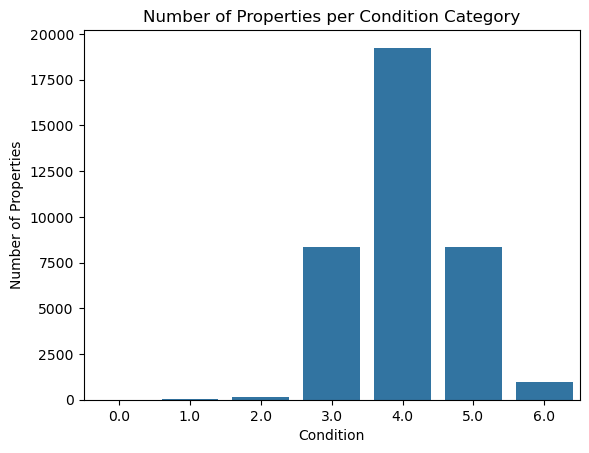

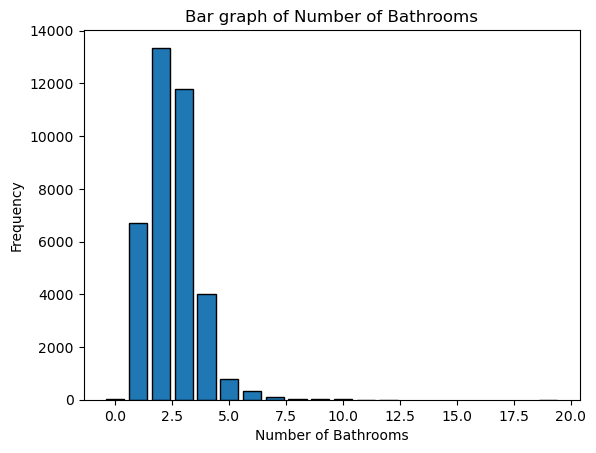

In [37]:
sns.countplot(x='cndtn', data=sales_trimmed_with_price)
plt.xlabel('Condition')
plt.ylabel('Number of Properties')
plt.title('Number of Properties per Condition Category')
plt.show()


bathroom_freq = sales_trimmed_with_price["bathrm"].value_counts().sort_index()
plt.bar(bathroom_freq.index, bathroom_freq.values, edgecolor='black')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")
plt.title("Bar graph of Number of Bathrooms")
plt.show()

# **Modeling**

Building Linear Regression Model as price as indep to addrees the SMART Q

This code is building a Linear regression model to predict the price of a house based on three features: the number of bathrooms, the number of bedrooms, and the grade of the house.

In [143]:
# Drop rows with missing values
sales_trimmed_with_price = sales_trimmed_with_price.dropna()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sales_trimmed_with_price[['bathrm', 'bedrm', 'grade']], sales_trimmed_with_price['price'], test_size=0.2, random_state=42)

# Instantiate the linear regression model
fit1 = LinearRegression()

# Fit the model to the training data
fit1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fit1.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 280986256649.8454
R-squared: 0.5423644721908076


The mean squared error value of 196713555641.4049 suggests that the model's predictions are not very accurate, while the R-squared value of 0.5906618340424517 indicates that the model explains about 58.3% of the variance in the target variable.

# Now Let's addd Heat as Predictor

In [147]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat']], sales_trimmed_with_price['price'], test_size=0.2, random_state=42)

# Instantiate the linear regression model
fit2 = LinearRegression()

# Fit the model to the training data
fit2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fit2.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 280520668936.3972
R-squared: 0.5431227636514853


Adding the "heat" variable as a predictor didn't seem to have a significant impact on the model's performance, as the mean squared error and R-squared values are only slightly different from the previous model.

In [150]:
#Updated the code that includes heat and cndtn as additional predictor variables:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn']],
    sales_trimmed_with_price['price'],
    test_size=0.2,
    random_state=42
)

# Instantiate the linear regression model
fit3 = LinearRegression()

# Fit the model to the training data
fit3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fit3.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

# Print the coefficients of the model
print("Coefficients:", fit3.coef_)

Mean squared error: 258804844708.28784
R-squared: 0.5784908019353887
Coefficients: [164723.6500079   15967.68634476 313870.40180323   3716.9691146
 232647.40605471]


Based on the output, we can see that the model with the additional predictor variables (heat and cndtn) has a lower mean squared error and a higher R-squared value compared to the model with only bathrm, bedrm, and grade. This suggests that the inclusion of heat and cndtn as predictor variables has improved the model's ability to predict the sale price of residential properties.

In [153]:
# Adding  gross building area (gba) as another predictor to the model:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba']],
    sales_trimmed_with_price['price'],
    test_size=0.2,
    random_state=42
)

# Instantiate the linear regression model
fit4 = LinearRegression()

# Fit the model to the training data
fit4.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fit4.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the summary
print("=== Linear Regression Summary ===")
print(f"Independent variables: {list(X_train.columns)}")
print(f"Dependent variable: price")
print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {fit4.coef_}")

=== Linear Regression Summary ===
Independent variables: ['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba']
Dependent variable: price
Training data size: 24499
Test data size: 6125
Mean squared error: 212482373114.2765
R-squared: 0.6539350923078139
Coefficients: [ 45474.64703669 -72781.65407855 221173.8025435     857.96809526
 257221.10348558    434.47093989]


By adding gross building area as an additional predictor, the performance of the model has improved, as indicated by the decrease in mean squared error and the increase in R-squared value. The coefficients of the model indicate that gross building area has the highest positive effect on price, followed by cndtn, grade, heat, bathrm, and bedrm. bedrm has a negative effect on price, which could indicate that more bedrooms are not always better for homebuyers, depending on other factors.

There is a correlation between the number of bedrooms and the sale price of a residential property in this dataset. However, the correlation is negative, meaning that as the number of bedrooms increases, the sale price tends to decrease.

There is a correlation between the grade and the sale price of a residential property in this dataset. The correlation is positive, meaning that as the grade of the property increases, the sale price tends to increase as well.

# **Linear Regression Model**

In [157]:
#Adding num_days_passed as predictor to the model:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba' , 'num_days_passed']],
    sales_trimmed_with_price['price'],
    test_size=0.2,
    random_state=42
)

# Instantiate the linear regression model
fit5 = LinearRegression()

# Fit the model to the training data
fit5.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fit5.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

# Print the coefficients of the model
print("Coefficients:", fit5.coef_)

Mean squared error: 189193546139.3211
R-squared: 0.6918650421630554
Coefficients: [ 3.82190059e+04 -7.49607294e+04  2.18272905e+05  1.08240797e+02
  2.15225311e+05  4.53650548e+02  1.11771057e+02]


A change in R-squared from 0.68 to 0.72 can be considered a moderate to large improvement in the model's predictive power, especially if the dataset is large enough to provide a robust evaluation.

# **Random Forest**

Accuracy: 0.8528979591836735
Precision: 0.8915387805889672
Recall: 0.9191789608723541


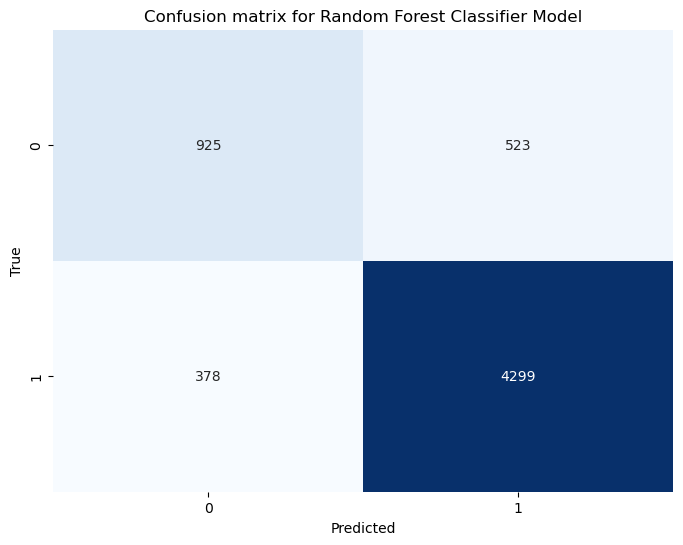

Accuracy: 0.856 (0.006)


In [161]:
X = sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba' , 'num_days_passed']]
# Define the threshold
threshold = 500000

# Define the binary target variable
y = (sales_trimmed_with_price['price'] > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Classifier model
model_RF = RandomForestClassifier()

# Fit the model to the training data
model_RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_RF.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Instantiate the Random Forest Classifier model
model_RF = RandomForestClassifier()

# Evaluate the model using cross-validation
scores = cross_val_score(model_RF, X, y, cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

# **Gradient Boosting Classifier model**

Accuracy: 0.8644897959183674
Precision: 0.8896090743366417
Recall: 0.9390635022450289


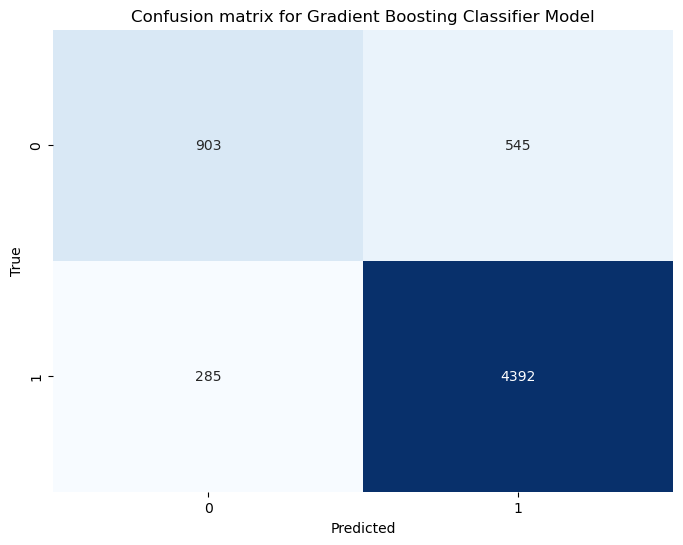

Accuracy: 0.862 (0.008)


In [163]:
# Define the predictor variables
#X = sales_trimmed_with_price[['bathrm', 'bedrm', 'gba', 'cndtn']]
X = sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba' , 'num_days_passed']]

# Define the threshold
threshold = 500000

# Define the binary target variable
y = (sales_trimmed_with_price['price'] > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Classifier model
model_LG= GradientBoostingClassifier()

# Fit the model to the training data
model_LG.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_LG.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

y_pred = model_LG.predict(X_test)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion matrix for Gradient Boosting Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Instantiate the Gradient Boosting Classifier model
model_LG = GradientBoostingClassifier()

# Evaluate the model using cross-validation
scores = cross_val_score(model_LG, X, y, cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))


# **XGBoost Classifier model**

Accuracy: 0.8612244897959184
Precision: 0.8929965085233107
Recall: 0.9296557622407526


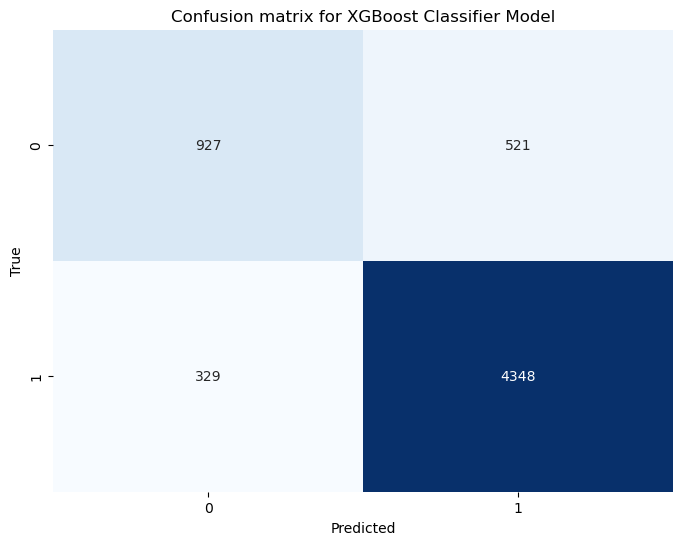

Accuracy: 0.863 (0.007)


In [165]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predictor variables
#X = sales_trimmed_with_price[['bathrm', 'bedrm', 'gba', 'cndtn']]
X = sales_trimmed_with_price[['bathrm', 'bedrm', 'grade', 'heat', 'cndtn', 'gba' , 'num_days_passed']]

# Define the threshold
threshold = 500000

# Define the binary target variable
y = (sales_trimmed_with_price['price'] > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost Classifier model
model_XGB = xgb.XGBClassifier()

# Fit the model to the training data
model_XGB.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_XGB.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion matrix for XGBoost Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Instantiate the XGBoost Classifier model
model_XGB = xgb.XGBClassifier()

# Evaluate the model using cross-validation
scores = cross_val_score(model_XGB, X, y, cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))


# **COVID Comparison**

In [167]:
sales["sale_year"] = sales["saledate"].dt.date

a=datetime.strptime('01-01-2019', '%m-%d-%Y').date()
b=datetime.strptime('02-29-2020', '%m-%d-%Y').date()
c=datetime.strptime('03-01-2020', '%m-%d-%Y').date()
d=datetime.strptime('07-31-2020', '%m-%d-%Y').date()
e=datetime.strptime('08-01-2020', '%m-%d-%Y').date()
f=datetime.strptime('12-31-2022', '%m-%d-%Y').date()

#d=pd.to_datetime('2022-12-31')

sales_trimmed = sales[(sales["sale_year"] >=a) & (sales["sale_year"] <= f) & sales["price"].notnull()].drop(cols_to_drop, axis = 1)

periods = [
    {'start': a, 'end': b, 'name': 'ExAnte'},
    {'start': c, 'end': d, 'name': 'Lock_down'},
    {'start': e, 'end': f, 'name': 'ExPost'}
]
def assign_period(row):
    sale_year = row['sale_year']
    for period in periods:
        if period['start'] <= sale_year <= period['end']:
            return period['name']
    return 'Unknown'

sales_trimmed['period'] = sales_trimmed.apply(assign_period, axis=1)
print(sales_trimmed['period'])

# %%
sales_num_trimmed = sales[(sales["sale_year"] >= a) & (sales["sale_year"] <= f) & sales["sale_num"].notnull()].drop(cols_to_drop, axis = 1)

def assign_period(row):
    sale_year = row['sale_year']
    for period in periods:
        if period['start'] <= sale_year <= period['end']:
            return period['name']
    return 'Unknown'

sales_num_trimmed['period'] = sales_num_trimmed.apply(assign_period, axis=1)
print(sales_num_trimmed['period'])

## Boxplot of residential sale prices in 3 periods(Ex Ante, lockdown, Ex Post)

g=datetime.strptime('01-01-2019', '%m-%d-%Y').date()
h=datetime.strptime('12-31-2019', '%m-%d-%Y').date()
i=datetime.strptime('12-31-2020', '%m-%d-%Y').date()
j=datetime.strptime('12-31-2021', '%m-%d-%Y').date()
k=datetime.strptime('12-31-2022', '%m-%d-%Y').date()
years=[g,h,i,j]

sales_trimmed['Real_price'] = sales_trimmed.apply(lambda row: row['price'] /1.018 if row['sale_year'] < h and row['sale_year']>=g
                           else row['price'] /1.012 if row['sale_year'] < i and row['sale_year']>=h
                           else row['price'] /1.047 if row['sale_year'] < j and row['sale_year']>=i
                           else row['price'] /1.08, axis=1)


sales_trimmed['Inflation'] = sales_trimmed.apply(lambda row: 1.018 if row['sale_year'] < h and row['sale_year']>=g
                           else 1.012 if row['sale_year'] < i and row['sale_year']>=h
                           else 1.047 if row['sale_year'] < j and row['sale_year']>=i
                           else 1.08, axis=1)

0         ExAnte
2         ExAnte
3         ExPost
8         ExPost
9         ExPost
           ...  
109009    ExAnte
109013    ExAnte
109019    ExPost
109025    ExPost
109033    ExPost
Name: period, Length: 25360, dtype: object
0         ExAnte
2         ExAnte
3         ExPost
8         ExPost
9         ExPost
           ...  
109009    ExAnte
109013    ExAnte
109019    ExPost
109025    ExPost
109033    ExPost
Name: period, Length: 25360, dtype: object


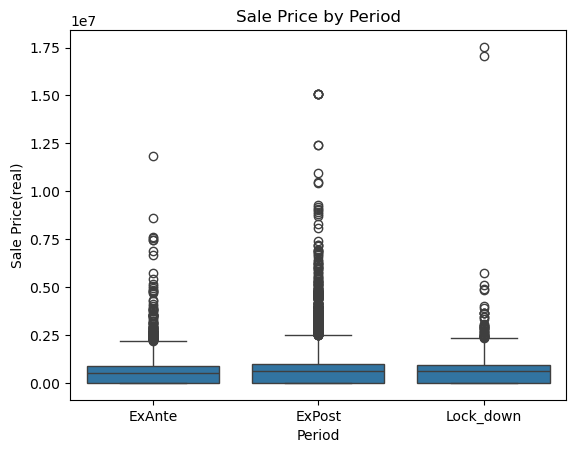

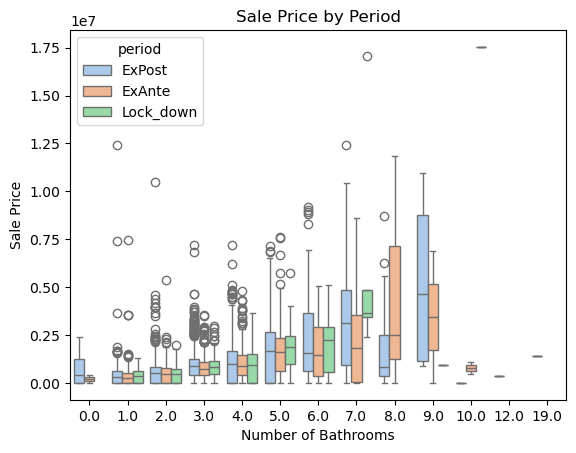

In [168]:
sns.boxplot(x="period", y="Real_price", data=sales_trimmed)
plt.title("Sale Price by Period")
plt.xlabel("Period")
plt.ylabel("Sale Price(real)")
plt.show()

sns.boxplot(x="bathrm", y="Real_price",hue="period", data=sales_trimmed, palette="pastel")
plt.title("Sale Price by Period")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale Price")
plt.show()


plt.show()

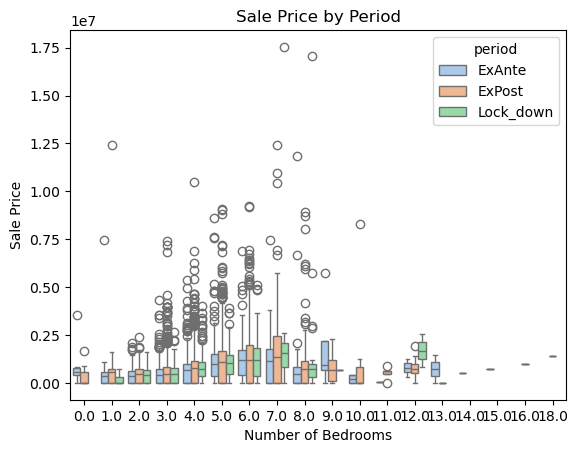

Text(0, 0.5, 'Sale Price')

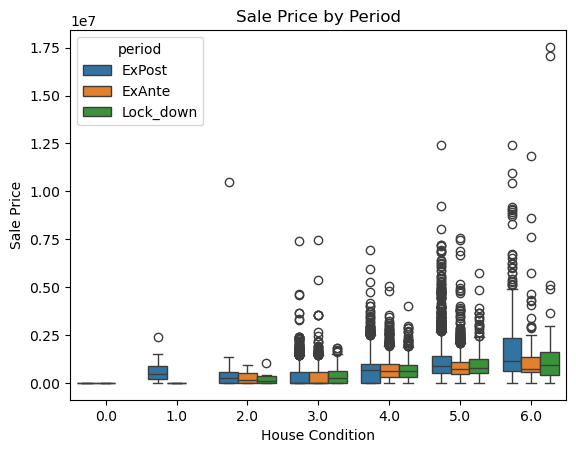

In [169]:
sns.boxplot(x="bedrm", y="Real_price",hue="period", palette="pastel", data=sales_trimmed)
plt.title("Sale Price by Period")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price")
plt.show()

sns.boxplot(x="cndtn", y="Real_price",hue="period", data=sales_trimmed)
plt.title("Sale Price by Period")
plt.xlabel("House Condition")
plt.ylabel("Sale Price")

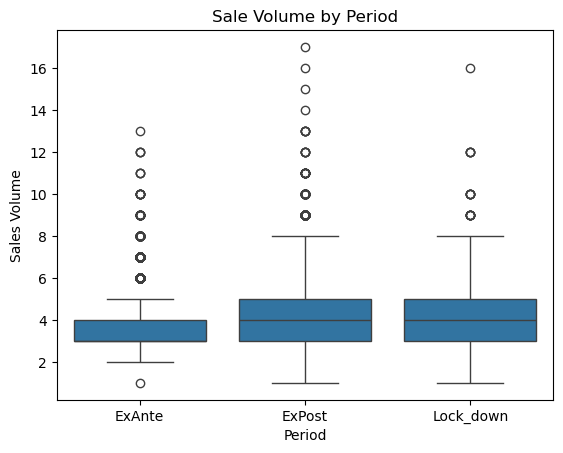

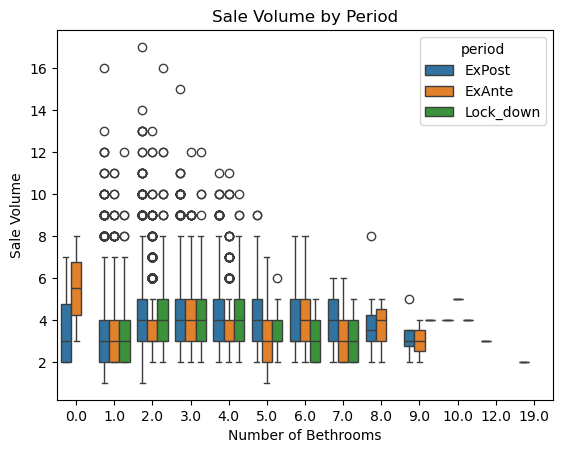

In [178]:
## Boxplot of residential sales numbers in 3 periods(Ex Ante, lockdown, Ex Post)

sns.boxplot(x="period", y="sale_num", data=sales_num_trimmed)
plt.title("Sale Volume by Period")
plt.xlabel("Period")
plt.ylabel("Sales Volume")
plt.show()

sns.boxplot(x="bathrm", y="sale_num",hue="period", data=sales_num_trimmed)
plt.title("Sale Volume by Period")
plt.xlabel("Number of Bethrooms")
plt.ylabel("Sale Volume")
plt.show()

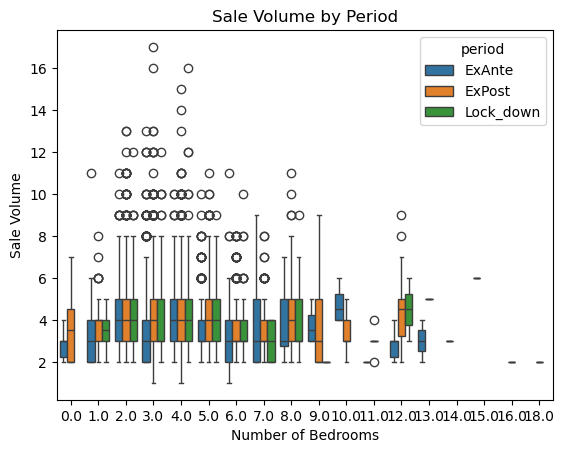

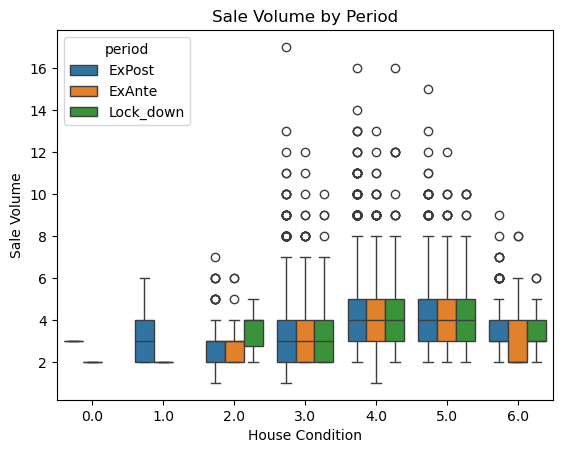

In [74]:
sns.boxplot(x="bedrm", y="sale_num",hue="period", data=sales_num_trimmed)
plt.title("Sale Volume by Period")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Volume")
plt.show()


sns.boxplot(x="cndtn", y="sale_num",hue="period", data=sales_num_trimmed)
plt.title("Sale Volume by Period")
plt.xlabel("House Condition")
plt.ylabel("Sale Volume")
plt.show()

In [180]:
model_1 = ols('Real_price ~ C(period)', data=sales_trimmed).fit()
anova_table = sm.stats.anova_lm(model_1, typ=2)
anova_table

model_2 = ols('sale_num ~ C(period)', data=sales_num_trimmed).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

# Impact of Covid on housing price and saliling number
from statsmodels.formula.api import glm
model3=glm(formula='Real_price ~C(period)+bathrm+bedrm+cndtn+gba', data=sales_trimmed).fit()
print(model3.summary())
model4=glm(formula='sale_num ~C(period)+bathrm+bedrm+cndtn+gba', data=sales_num_trimmed).fit()
print(model4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Real_price   No. Observations:                24579
Model:                            GLM   Df Residuals:                    24572
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                      3.8611e+11
Method:                          IRLS   Log-Likelihood:            -3.6275e+05
Date:                Sun, 08 Dec 2024   Deviance:                   9.4876e+15
Time:                        13:17:26   Pearson chi2:                 9.49e+15
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3735
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.06